In [1]:
print("hello")

hello


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("data/stud.csv")
data.head(3)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


1 .check missing values 

In [5]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no miussing value in the dataset. We can proceed with the EDA.

2 .Check duplicate values

In [6]:
data.duplicated().sum()

np.int64(0)

No dulpicates and no missing values. We can proceed with EDA.

3 . checking the data types of the columns

In [9]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


In [12]:
print("categories in gender column -> ", data['gender'].unique())
print("categories in race_ethnicity column -> ", data['race_ethnicity'].unique())
print("categories in parental_level_of_education column -> ", data['parental_level_of_education'].unique())
print("categories in lunch column -> ", data['lunch'].unique())
print("categories in test_preparation_course column -> ", data['test_preparation_course'].unique())


categories in gender column ->  <StringArray>
['female', 'male']
Length: 2, dtype: str
categories in race_ethnicity column ->  <StringArray>
['group B', 'group C', 'group A', 'group D', 'group E']
Length: 5, dtype: str
categories in parental_level_of_education column ->  <StringArray>
[ 'bachelor's degree',       'some college',    'master's degree',
 'associate's degree',        'high school',   'some high school']
Length: 6, dtype: str
categories in lunch column ->  <StringArray>
['standard', 'free/reduced']
Length: 2, dtype: str
categories in test_preparation_course column ->  <StringArray>
['none', 'completed']
Length: 2, dtype: str


In [24]:
numeric_cols = [features for features in data.columns if data[features].dtype != 'string']
categorical_cols = [features for features in data.columns if data[features].dtype == 'string']

print("Numeric columns are : ", len(numeric_cols),numeric_cols)
print("Categorical columns are : ", len(categorical_cols),categorical_cols)

Numeric columns are :  3 ['math_score', 'reading_score', 'writing_score']
Categorical columns are :  5 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [21]:
data.dtypes

gender                           str
race_ethnicity                   str
parental_level_of_education      str
lunch                            str
test_preparation_course          str
math_score                     int64
reading_score                  int64
writing_score                  int64
dtype: object

In [26]:
data["total_score"] = data["math_score"] + data["reading_score"] + data["writing_score"]
data["average_score"] = data["total_score"] / 3
data.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [29]:
reading_score = data[data["reading_score"] ==100]["average_score"].count()
math_score = data[data["math_score"] ==100]["average_score"].count()
writing_score = data[data["writing_score"] ==100]["average_score"].count()
print(f"number of students who scored 100 in reading score are : {reading_score}")
print(f"number of students who scored 100 in math score are : {math_score}")
print(f"number of students who scored 100 in writing score are : {writing_score}")

number of students who scored 100 in reading score are : 17
number of students who scored 100 in math score are : 7
number of students who scored 100 in writing score are : 14


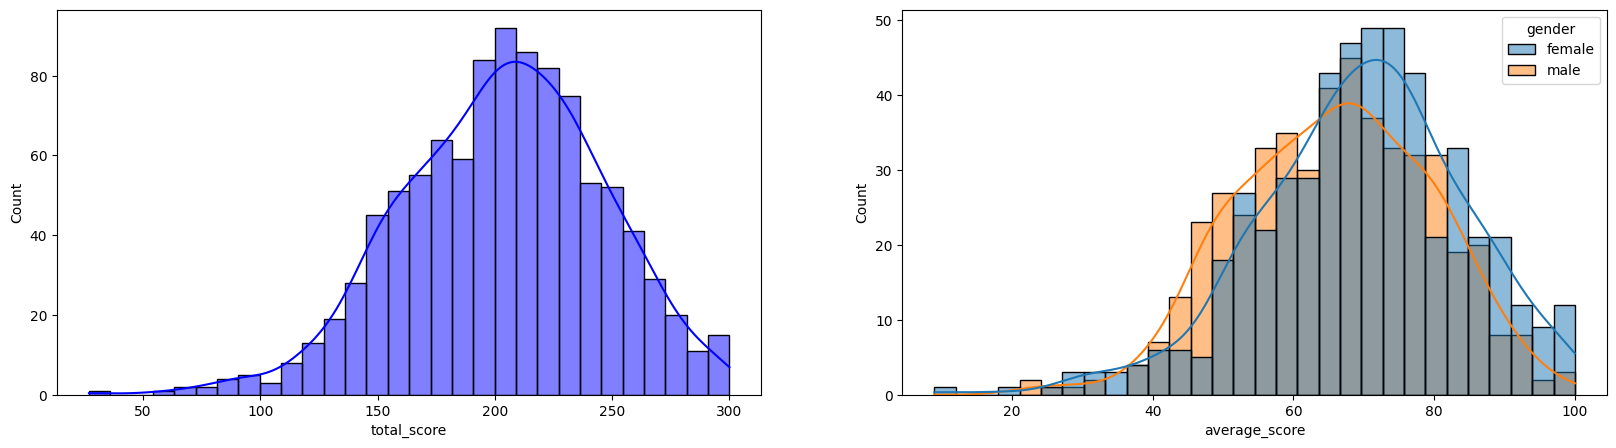

In [34]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(data=data,x = "total_score", kde=True,bins=30,color="blue")
plt.subplot(1,2,2)
sns.histplot(data=data,x = "average_score", kde=True,bins=30,hue="gender")
plt.show()